# Data understanding, motivation, results, and limitations



## Data understanding


The dataset is a cleaned version of the original set which was collected during an anonymous survey conducted between January and June 2023. That dataset can be used for predictive modeling in mental health research, particularly in identifying key contributors to mental health challenges in a non-clinical setting.


The target dataset provides a more analysis-ready version for data scientists. It had gone through data cleaning (i.e. missing data, duplication) and has reduced number of features (columns), narrowing it down to the more important facets of depression in studnts. In particular, it contains 502 entres with 9 different features involving around the target variable, Depression.

Unlike others, the target variable, Depression, is only a diagnosis given presumably by the original dataset's author, Dr. Samay Pathak, based the other variables collected from the survey. No additional information is found about how conclusions are made.



Link: https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset

Link (original dataset): https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis



## Motivation

The dataset is a perfect material for applying Machine Learning model to predict Depression diagnosis. It also provides a great opportunity to match professsional-level diagnosis in non-clinical setting as the data are from surveys that participants answered without requiring any professional mental health assessments or diagnostic test scores.

The analysis and data modelling of this dataset should provides significant insights onto how everyday factor affects the mental well-being of students and support early diagnosis and prevention against depression and its impacts on students.

It is worth noting that because the target variable was not collected and is only (presumably) diagnosis by a doctor, model accuracy should not be interpreted as how well it predicts depression in student but as how well it matches diagnoses of a professional.

## Result
After some additional cleaning and pre-processing, the datatset was used to train a logistic regression model with Depression as the target variables. Not all features of the set were used and selection was conducted based on correlation strength between each feature and Depression.

The Logistic Regression model utilized the sklearn library and used the default values for most hyperparameters. A seed number (2025) was set where appropriate to ensure reproducibility of the model and its results.

On the testset, the model scored an accuracy score of ~92% over 101 examples. Such performance is indicative a strong predictive power, showing how closely machine learning can match diagnosis of a professional using non-clinical data.


The model reinforced some common-sense connection while also brought about interesting insights onto diagnosing Depression and its relating factors in students:
- The most significant indicators of Depression in student include having suicidal thoughts, high academic pressure, and high financial stress, respectively.
- Students' study satisfaction, while having little to no effect in indicating Depression when low, reduces chance of having depression significantly when high.
- Age is not particularly indicative in determining Depression in students in comparison to other factors.
- Having a healthy diet is a significant sign of non-depression.

## Limitation
There are a few limitations on the model and how it was developed that could be corrected in future studies or attempts to improve its accuracy and practicality. These include:
1. The model was trained and tested on a relatively small dataset. This creates a risk where it performs much worse on other unseen data with unseen patterns.
2. For the same reason, the cases where the model made wrong prediction constitute a very small sample. It makes it hard to establish of a pattern in wrong predictions to enhance the model further.
3. The target variable's is loosely understood as there is not much documentation on it. If the presumptions on how it is made are not correct, it is vital to revise how the model and its results are interpreted.
4. The model development process is fairly simple and computationally-inexpensive. More intricate and complex methods and processes could be applied to further enhance its predictive power.

# Importing libraries and data

In [1]:
# Import libraries

# General data analytics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
# Pre-processing + transformers
from sklearn.preprocessing import MinMaxScaler

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#import libraries for model evaluation
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Comment: Even though it is possible to pull data directly from Kaggle, I chose to download it to my drive. This is to avoid potential updates or changes to the online file, making the analysis no longer valid.

In [3]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/Github/2 Depression Student Dataset/Depression Student Dataset.csv')
df.head(10)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
5,Male,19,4.0,4.0,5-6 hours,Unhealthy,Yes,1,4,Yes,Yes
6,Female,34,4.0,2.0,More than 8 hours,Moderate,Yes,6,2,No,Yes
7,Female,20,4.0,1.0,More than 8 hours,Healthy,Yes,3,4,Yes,Yes
8,Female,33,1.0,4.0,More than 8 hours,Moderate,No,10,3,No,No
9,Male,33,4.0,3.0,Less than 5 hours,Unhealthy,Yes,10,1,No,Yes


In [4]:
# Inspecting data
print(df.shape)
print(df.dtypes)

(502, 11)
Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object


In [5]:
#Rename columns to make them more accessable
new_names = {'Academic Pressure':'Academ_pres',
             'Study Satisfaction':'Study_satis',
             'Sleep Duration':'Sleep_dur',
             'Dietary Habits':'Diet_habit',
             'Have you ever had suicidal thoughts ?':'Suicide_thoughts',
             'Study Hours':'Study_hrs',
             'Financial Stress':'Fin_stres',
             'Family History of Mental Illness':'Fam_hist_mental_illness',
             'Depression':'Depression'}

df = df.rename(columns=new_names)
df.columns

Index(['Gender', 'Age', 'Academ_pres', 'Study_satis', 'Sleep_dur',
       'Diet_habit', 'Suicide_thoughts', 'Study_hrs', 'Fin_stres',
       'Fam_hist_mental_illness', 'Depression'],
      dtype='object')

# Data cleaning
To double-check cleanliness and quality of data, I will perform some simple inspection and cleaning.

## 1. Missing data

In [6]:
# Checking for missing data
for colu in df.columns:
  print('{} is missing: '.format(colu),df[colu].isna().sum(),' entries')

Gender is missing:  0  entries
Age is missing:  0  entries
Academ_pres is missing:  0  entries
Study_satis is missing:  0  entries
Sleep_dur is missing:  0  entries
Diet_habit is missing:  0  entries
Suicide_thoughts is missing:  0  entries
Study_hrs is missing:  0  entries
Fin_stres is missing:  0  entries
Fam_hist_mental_illness is missing:  0  entries
Depression is missing:  0  entries


## 2. Outliers

In [7]:
# Checking stats on the data
df.describe()

,Age,Academ_pres,Study_satis,Study_hrs,Fin_stres
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


## 3. Data type

In [8]:
df.dtypes

,0
Gender,object
Age,int64
Academ_pres,float64
Study_satis,float64
Sleep_dur,object
Diet_habit,object
Suicide_thoughts,object
Study_hrs,int64
Fin_stres,int64
Fam_hist_mental_illness,object


Comment: Some variables are actually ordinal but presented in form of number and python mistakenly see them as either 'int64' or 'float64' or 'object'. To correctly reflect data meaning and make it easier for performing EDA and visualizations, these data will be converted to category.

In [9]:
# Converting to categorical, preserving intended order while reducing memmory usage
print('BEFORE conversion')
print(df.memory_usage().sum())

pairs = {'Academ_pres': [1,2,3,4,5],
          'Study_satis': [1,2,3,4,5],
          'Sleep_dur':['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours'],
          'Diet_habit': ['Unhealthy','Moderate','Healthy'],
          'Fin_stres':[1,2,3,4,5],}

for key, value in pairs.items():
  df[key] = df[key].astype('category')
  df[key] = df[key].cat.reorder_categories(new_categories=value,ordered=True)


print('AFTER conversion')
print(df.memory_usage().sum())

print(df.dtypes)

BEFORE conversion
44308
AFTER conversion
27710
Gender                       object
Age                           int64
Academ_pres                category
Study_satis                category
Sleep_dur                  category
Diet_habit                 category
Suicide_thoughts             object
Study_hrs                     int64
Fin_stres                  category
Fam_hist_mental_illness      object
Depression                   object
dtype: object


# Exploratory Data Analysis (EDA)

## 1. Univeriate analysis (we will look at each variable individually)

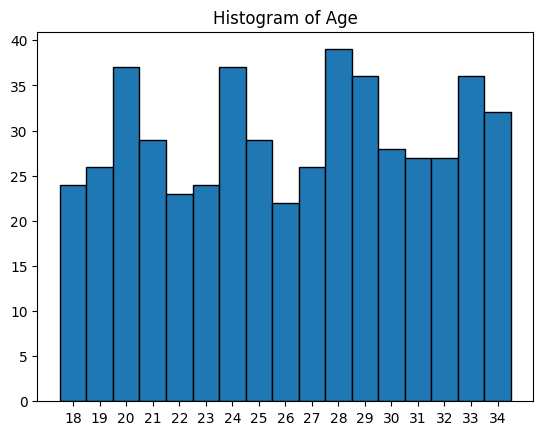

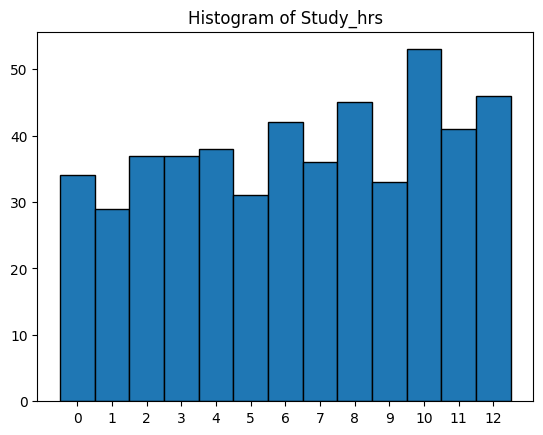

In [10]:
# Visualizing numerical data
for i in df.select_dtypes(include=['int64']).columns:
  plt.hist(df[i], bins=range(df[i].min(), df[i].max() + 2), align='left', edgecolor='black')
  plt.xticks(df[i].unique())  # force integer x-axis ticks
  plt.title('Histogram of {}'.format(i))
  plt.show()

Comment: Numerical variables of that dataset spread across its distribution with no obvious center.

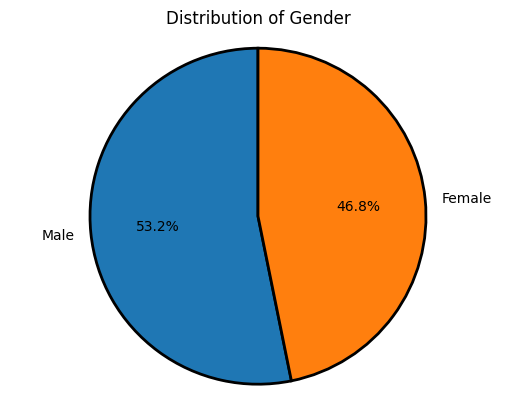

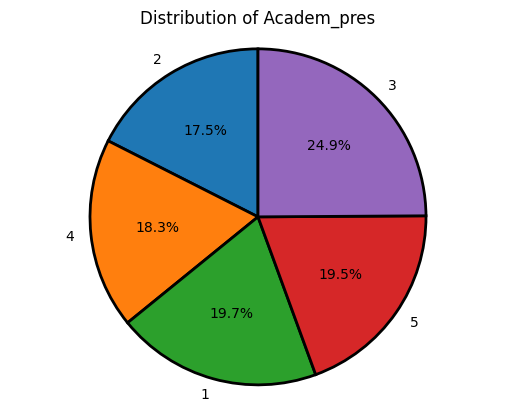

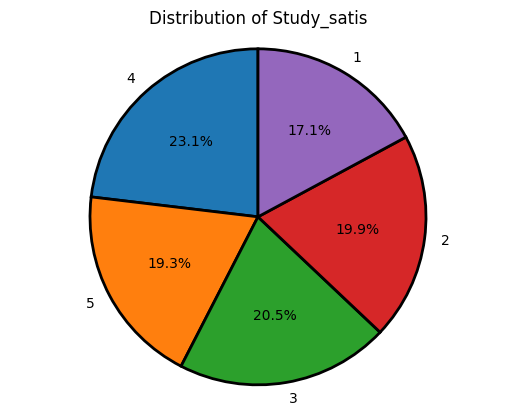

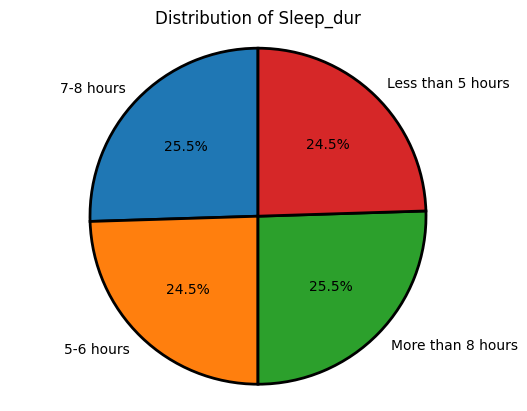

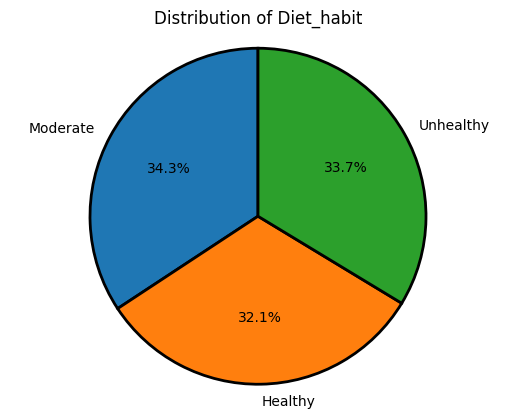

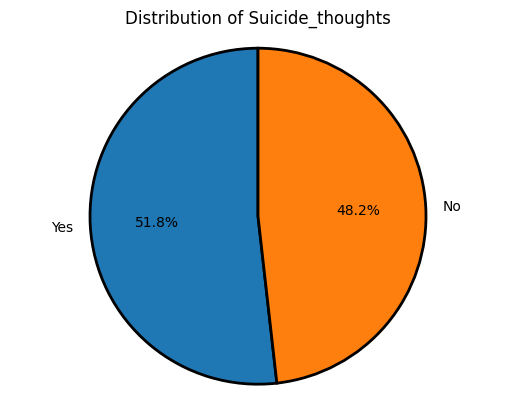

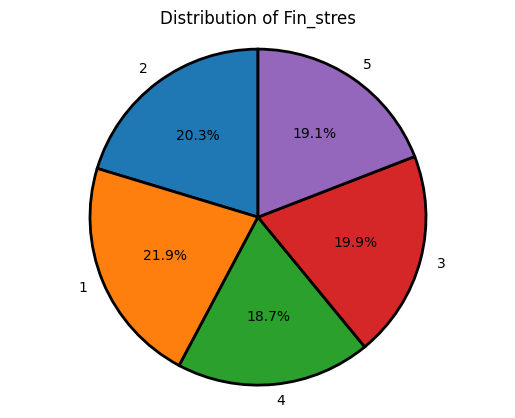

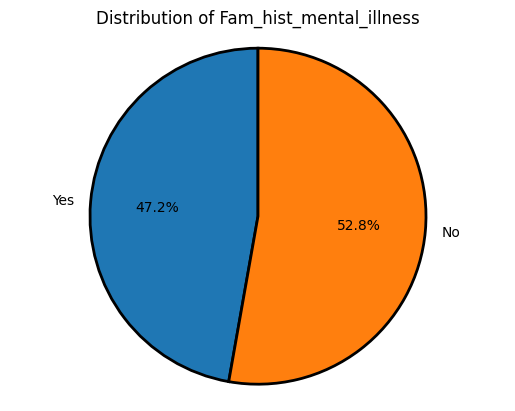

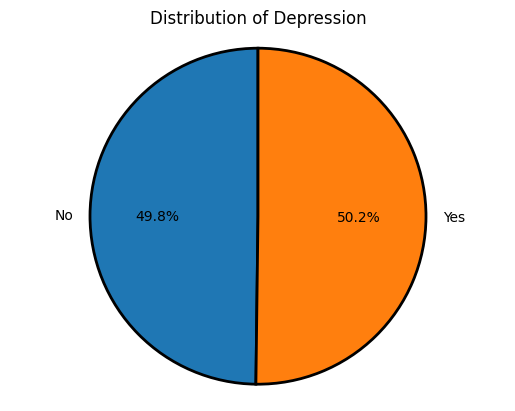

In [11]:
# Visualzing categorical data proportions with pie chart
values = []

for col in df.select_dtypes(include=['category','object']).columns:
  # Get unique labels
  labels = df[col].unique()
  # Count occurrences for each label
  for label in labels:
    count = df[df[col] == label][col].count()
    values.append(int(count))
  # Create pie chart
  plt.pie(values, labels=labels,
                      autopct='%1.1f%%',
                      startangle=90,
                      wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
  plt.title('Distribution of {}'.format(col))
  plt.axis('equal')  # Equal aspect ratio makes it a circle
  plt.show()
  values = []

Comment: The same applies to variables classified as category (ordinal) and object (nominal).

## Bivariate Analysis
We will look at pair-wise correlations in the dataset.

(502, 23)


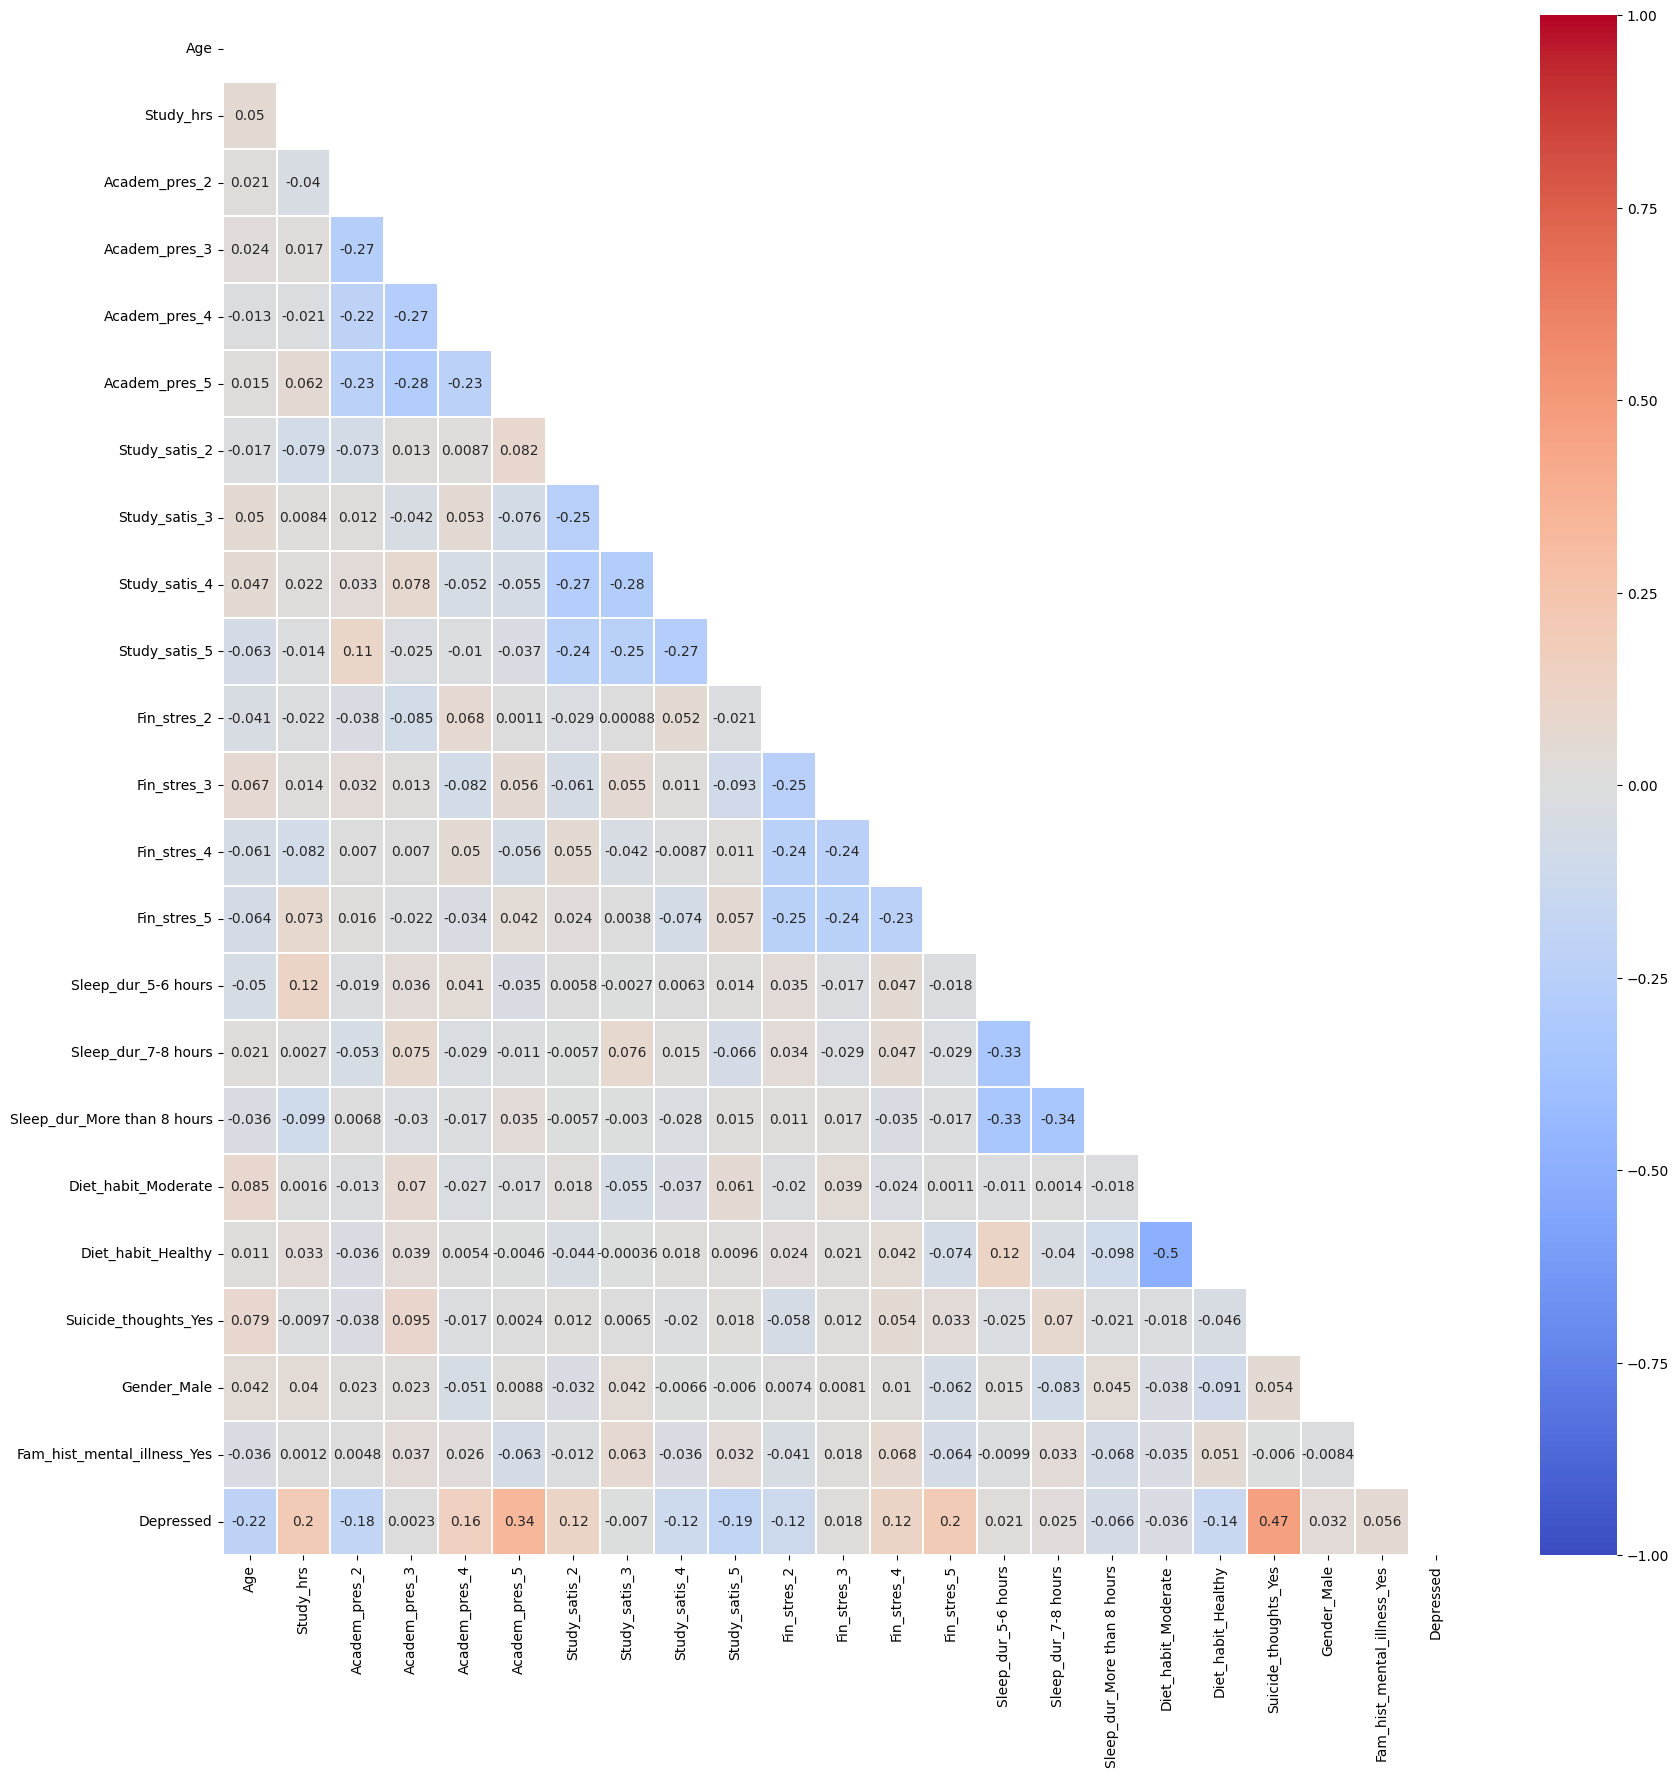

In [12]:
# Correlation mapping to see linear correlations
## Dummy encoding
tar_cat_col = ['Academ_pres','Study_satis','Fin_stres','Sleep_dur','Diet_habit','Suicide_thoughts','Gender','Fam_hist_mental_illness','Depression']
df = pd.get_dummies(df, columns =tar_cat_col, drop_first=True)
print(df.shape)

## moving back depression to last column for easier comparison
df['Depressed'] = df['Depression_Yes']
df = df.drop(['Depression_Yes'],axis=1)

## Create heatmap of correlation between Depressed and indepedent variables
plt.figure(figsize=(20, 20))

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Comment:
- Looking at the correlation table, it seems like academic pressure, financial stress and having suicidal thoughts are among top indicator of depression in students. On the opposite site, more aged students with more satisfaction in studying would be much less likely to fall victim to this mental problem.

- There also seem to be no significant correlation between independent variables.

# Machine Learning Model

## 1. Splitting dataset and choose features

Based on correlation matrix, there are a few good indicators of depression: Age

In [13]:
#Selecting predictors/features
features = ['Age','Study_hrs','Suicide_thoughts_Yes','Academ_pres_5','Academ_pres_4','Study_satis_2','Study_satis_4','Study_satis_5','Fin_stres_2','Fin_stres_3','Fin_stres_4','Fin_stres_5','Diet_habit_Healthy']

#complete the code below
X = df[features]
y = df.Depressed

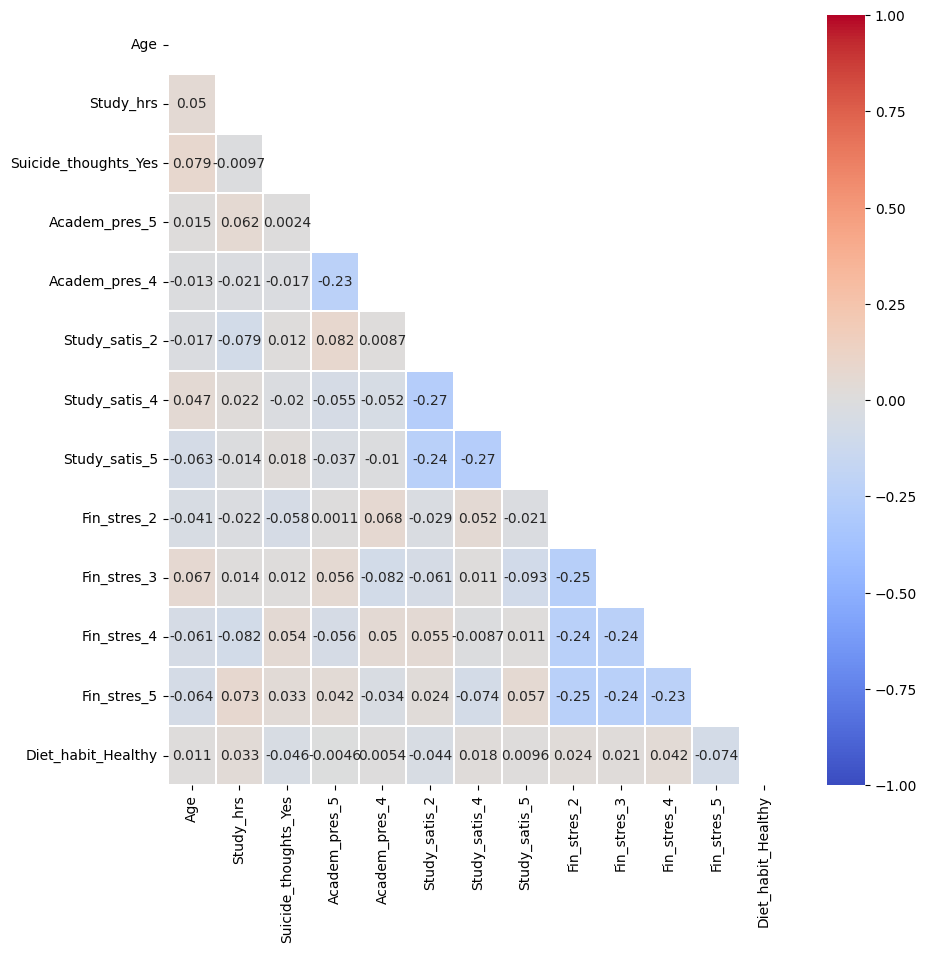

In [14]:
# Examine correlation between chosen variables
features4heatmap = features
plt.figure(figsize=(10, 10))

corr = df[features4heatmap].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Comment: No significant correlation detected between features. Some feature pairs exhibited somewhat notable coefficients but it is explainable as they are all derived from same category variable.

In [15]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)  # 80% training and 20% testing

# Inspecting training and test set
print('Shape of the trainset is:')
print(X_train.shape)
print('Shape of the testset is:')
print(X_test.shape)

Shape of the trainset is:
(401, 13)
Shape of the testset is:
(101, 13)


## 2. Logistics Regression

### Training and testing

In [16]:
# Rescaling integer data to ensure no bias
mms = MinMaxScaler() # Normalization
df['Age'] = mms.fit_transform(df[['Age']])
df['Study_hrs'] = mms.fit_transform(df[['Study_hrs']])

In [17]:
# Initializing a logistic regression model
logreg = LogisticRegression(max_iter=100)

# Training model on training set
logreg = logreg.fit(X_train, y_train)

# Making prediction on test set
y_pred = logreg.predict(X_test)

### Evaluation

In [18]:
# Calling standard metrics of accuracy for classification models
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.9207920792079208
Precision:  0.9555555555555556
Recall:  0.8775510204081632
F1:  0.9148936170212766


In [19]:
#print confusion matrix and evaluation report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[50  2]
 [ 6 43]]
              precision    recall  f1-score   support

       False       0.89      0.96      0.93        52
        True       0.96      0.88      0.91        49

    accuracy                           0.92       101
   macro avg       0.92      0.92      0.92       101
weighted avg       0.92      0.92      0.92       101



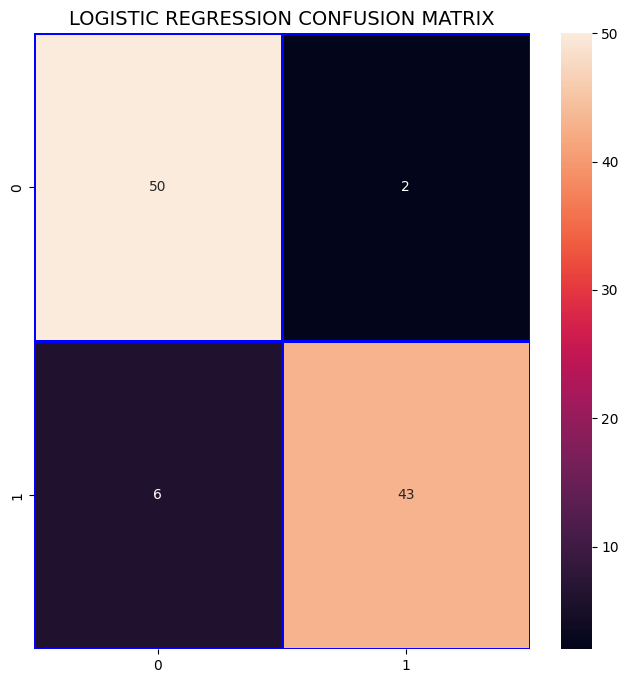

In [20]:
# Visualizing confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="blue",linewidths=2)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [21]:
# Checking examples where predictions do not match ground truth data
## joining unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

## joining iodependent variables with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

## Checking false positives
FP = inspection[(inspection['Actual'] == 0) & (inspection['Predicted'] == 1)]

df_ori = pd.read_csv('/content/drive/MyDrive/Github/2 Depression Student Dataset/Depression Student Dataset.csv')
df_ori.loc[list(FP.index)]

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
378,Male,18,3.0,3.0,7-8 hours,Moderate,No,6,3,No,No
97,Male,33,4.0,4.0,7-8 hours,Healthy,Yes,11,1,Yes,No


In [22]:
## Checking false negatives
FN = inspection[(inspection['Actual'] == 1) & (inspection['Predicted'] == 0)]

df_ori.loc[list(FN.index)]

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
442,Female,29,3.0,3.0,5-6 hours,Healthy,Yes,10,1,Yes,Yes
273,Male,32,3.0,2.0,7-8 hours,Moderate,Yes,8,2,Yes,Yes
460,Female,28,3.0,1.0,More than 8 hours,Healthy,Yes,5,3,Yes,Yes
368,Female,24,3.0,1.0,5-6 hours,Healthy,No,6,4,Yes,Yes
426,Female,27,4.0,2.0,5-6 hours,Unhealthy,No,2,4,Yes,Yes
84,Female,34,3.0,2.0,7-8 hours,Unhealthy,Yes,0,4,Yes,Yes


Comment: There is no variable that stands out and establishes a pattern in false negatives cases. Larger sample sizes may need to be observed to confidently establish a pattern.

Axes(0.125,0.11;0.775x0.77)
Age                    -0.234546
Study_hrs               0.254438
Suicide_thoughts_Yes    3.502222
Academ_pres_5           3.346436
Academ_pres_4           2.581171
Study_satis_2           0.029213
Study_satis_4          -0.850542
Study_satis_5          -1.802361
Fin_stres_2            -0.166934
Fin_stres_3             1.081244
Fin_stres_4             1.444299
Fin_stres_5             2.015534
Diet_habit_Healthy     -1.143346
dtype: float64


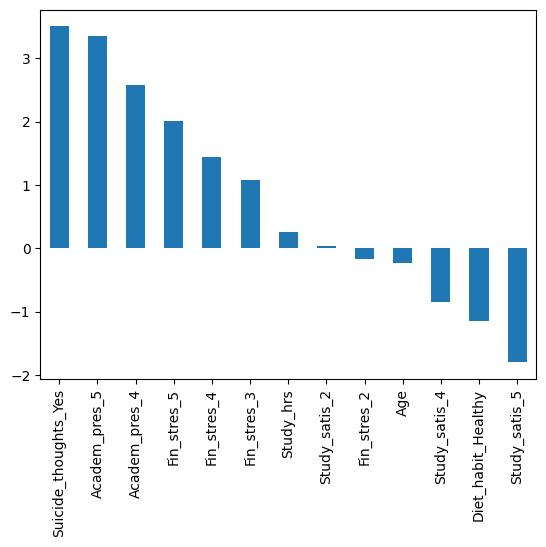

In [23]:
#Visualise the coefficients
coefs = pd.Series(logreg.coef_[0], index=X.columns.values)
print(coefs.sort_values(ascending = False).plot(kind='bar'))
print(coefs)

## ROC Curve
Thee default logistic regression model in sklearn will predict True if the predicted probability of the test example exceed 0.5. We will try to see what is the trade-off between false positive rate (FPR) and true positive rate (TPR) as we move the threshold from 0 to 1.

In [24]:
# Pobabilities of the classes on the test set
probs = logreg.predict_proba(X_test)
print(probs[0:10])

[[6.96575348e-02 9.30342465e-01]
 [1.53072412e-01 8.46927588e-01]
 [1.64608913e-01 8.35391087e-01]
 [3.93197812e-01 6.06802188e-01]
 [9.95257569e-01 4.74243135e-03]
 [6.71890327e-01 3.28109673e-01]
 [7.02423891e-01 2.97576109e-01]
 [9.99435218e-01 5.64782408e-04]
 [3.08747896e-03 9.96912521e-01]
 [4.93705854e-01 5.06294146e-01]]


In [25]:
# Probabilities for the positive class
y_prob = probs[:, 1]
print(y_prob)

[9.30342465e-01 8.46927588e-01 8.35391087e-01 6.06802188e-01
 4.74243135e-03 3.28109673e-01 2.97576109e-01 5.64782408e-04
 9.96912521e-01 5.06294146e-01 2.25040702e-01 7.67762926e-01
 3.74848465e-01 7.03480593e-01 2.66942102e-02 9.13641258e-01
 8.54644974e-01 6.66926191e-01 5.21825967e-01 1.05365838e-03
 9.63257336e-01 4.82066293e-01 4.35499420e-01 7.79041795e-01
 4.92649039e-03 3.17924381e-01 2.13739374e-02 3.28830717e-02
 8.92766375e-01 1.44221348e-02 8.43370977e-01 9.86959919e-01
 1.81421033e-01 2.19899813e-02 9.99041811e-01 3.33385781e-01
 6.23949150e-02 2.69465265e-03 8.16673054e-03 8.77585501e-01
 1.84477020e-01 5.94942958e-01 6.05008143e-01 1.19552144e-01
 2.09255216e-02 3.85483427e-01 3.36543290e-01 4.46246698e-01
 2.57326657e-01 5.08878303e-02 4.45593855e-03 1.74942373e-02
 9.83925996e-01 1.24940309e-01 4.61707820e-01 9.93822714e-01
 1.17555785e-01 9.80391992e-03 1.03178961e-01 5.43989770e-01
 9.57470077e-01 2.65935995e-02 2.28797920e-01 9.27635858e-01
 8.18801252e-01 1.911543

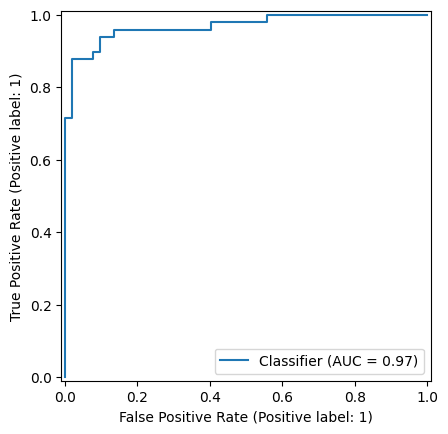

In [26]:
# RocCurve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.show()

Best thredshold 0.5218259673971806


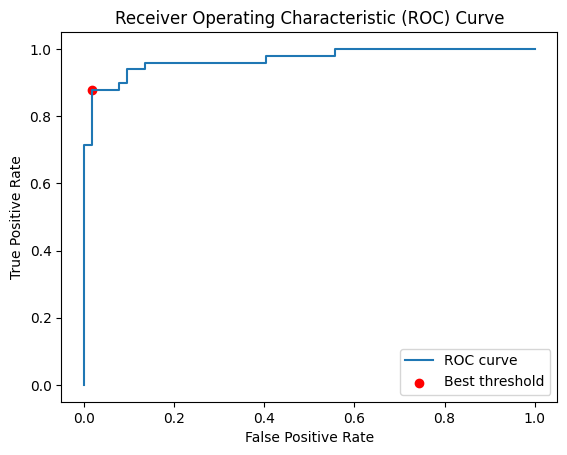

In [27]:
# Determining best threshold based on distance between TPR and FPR
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Find best threshold based on the distance between tpr - fpr
optimal_idx = (tpr - fpr).argmax()
best_threshold = thresholds[optimal_idx]
print('Best thredshold', best_threshold)
# plot the ROC curve and the best point
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o',
color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [28]:
inspection['probs'] = y_prob
inspection['n_Predicted'] = [1 if x > best_threshold else 0 for x in y_prob]
inspection.head(10)

,Age,Study_hrs,Suicide_thoughts_Yes,Academ_pres_5,Academ_pres_4,Study_satis_2,Study_satis_4,Study_satis_5,Fin_stres_2,Fin_stres_3,Fin_stres_4,Fin_stres_5,Diet_habit_Healthy,Actual,Predicted,probs,n_Predicted
424,19,11,False,False,True,True,False,False,False,False,False,False,False,True,True,0.930342,1
496,29,9,True,False,False,False,False,False,False,True,False,False,False,True,True,0.846928,1
120,26,0,True,False,True,False,False,False,False,False,False,False,False,True,True,0.835391,1
369,27,7,False,True,False,False,False,False,False,False,False,False,False,True,True,0.606802,1
74,33,8,False,False,False,True,False,False,True,False,False,False,True,False,False,0.004742,0
283,18,5,False,False,False,False,True,False,False,False,True,False,False,False,False,0.328110,0
297,33,6,True,False,False,False,False,True,False,False,False,True,False,False,False,0.297576,0
417,34,4,False,False,False,False,True,False,True,False,False,False,True,False,False,0.000565,0
57,20,5,True,False,True,True,False,False,False,False,True,False,False,True,True,0.996913,1
378,18,6,False,False,False,False,False,False,False,True,False,False,False,False,True,0.506294,0


In [29]:
#print confusion matrix and evaluation report
cm1 = confusion_matrix(y_test, inspection['n_Predicted'])
print(cm1)
print(classification_report(y_test, inspection['n_Predicted']))

[[51  1]
 [ 7 42]]
              precision    recall  f1-score   support

       False       0.88      0.98      0.93        52
        True       0.98      0.86      0.91        49

    accuracy                           0.92       101
   macro avg       0.93      0.92      0.92       101
weighted avg       0.93      0.92      0.92       101



Comment: After adjusting threshold, we reduced 1 case of false positive but made another case of fasle negative. No notable improvement detected from changing the threshold. The default threshold will stay applied.

In [30]:
# Printing final formula of logistic regression
intercept = 1.28285867 # obtained by calling logreg.intercept_; it is faster to just copy paste the value as float
features = coefs.index

# Start the formula with the intercept
formula = f"Depression = {intercept:.3f}"

# Add each coefficient and corresponding feature
for coef, name in zip(coefs, features):
    formula += f" + {coef:.3f}*{name}"

print(formula)

Depression = 1.283 + -0.235*Age + 0.254*Study_hrs + 3.502*Suicide_thoughts_Yes + 3.346*Academ_pres_5 + 2.581*Academ_pres_4 + 0.029*Study_satis_2 + -0.851*Study_satis_4 + -1.802*Study_satis_5 + -0.167*Fin_stres_2 + 1.081*Fin_stres_3 + 1.444*Fin_stres_4 + 2.016*Fin_stres_5 + -1.143*Diet_habit_Healthy
